# PreProcessing of the data

## Adding DataSet

In [ ]:
!pip install -q kaggle
from google.colab  import files
files.upload()
!mkdir ~/.kaggle


Saving kaggle.json to kaggle.json


In [ ]:
cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjuntejaswi/plant-village
!unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

## Importing and Installing needed libraries and modules

In [ ]:
!pip install silence_tensorflow
!pip install tensorflow
!pip install -r requirements.txt



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4475 sha256=599139e1345d2c9a40ded03fad96abcd202568b5f8beed516ccfee74fdafa6f8
  Stored in directory: /root/.cache/pip/wheels/d6/ec/29/1ed23ae577b310931b534a6da0aa3adc169deef9a8ef10bd26
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5651 sha256=afa58a26a5b7759af6df02c4e46d34955fcd3eb4f6589c62ca9fa27d208fb3f6
  Stored in directory: /root/.cache/pip/wheels/7c/a1/b1/9662c79502c353ff7e71c36f84846acd623cbcbe3f7255f5d5
Successfully built silence_tensorflow support_developer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import models,layers
from silence_tensorflow import silence_tensorflow
import matplotlib.pyplot as plt

## Declaring Important Variables and Integrating Dataset via API

In [ ]:
BATCH_SIZE = 32
print(tf. __version__)
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 66

2.11.0


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


## Checking for GPU acceleration and CUDA support

In [ ]:
!nvidia-smi

Tue Mar 21 10:59:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |    341MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Exploring the dataset

In [ ]:
class_names=dataset.class_names

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 2 10  2 14  6  9 12  7  5 10  1 12 14  1  5  8  1 10  7 12  3 12  7  5
  9  9  6  5 14 11 11  2]


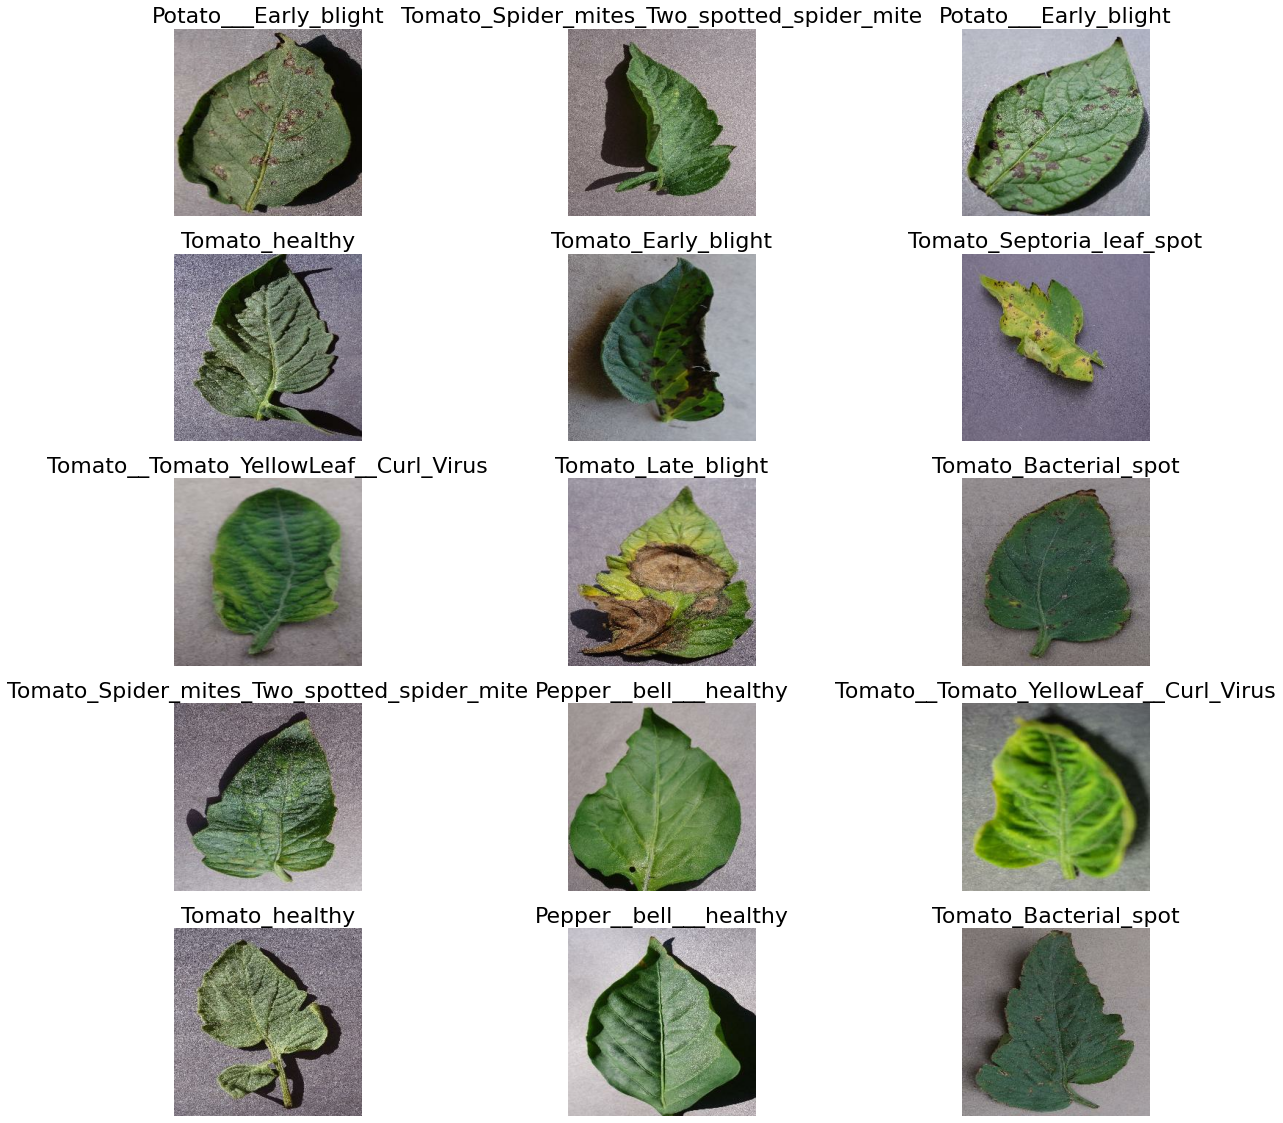

In [ ]:
plt.figure(figsize=(20,20))
for i in range(15):
    ax = plt.subplot(5,3,i+1)
 
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]], fontsize=22)
    plt.axis("off")


## Test Train and Validation Distribution

In [ ]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=50):
    
    assert(train_split+ test_split+val_split) ==1
    
    ds_size = len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=5)
        
    train_size = int(train_split*ds_size)
    val_size= int(val_split* ds_size)
    
    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    
    

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions(dataset)

## Shuffle and Prefetch

In [ ]:
train_ds=train_ds.shuffle(20).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds=val_ds.shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)


test_ds=test_ds.shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)


## Normalizing Image 0-1 & Data Augmentation

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
]
)


In [ ]:
# train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# )

In [ ]:
labels_batch.numpy()

array([ 2, 10,  2, 14,  6,  9, 12,  7,  5, 10,  1, 12, 14,  1,  5,  8,  1,
       10,  7, 12,  3, 12,  7,  5,  9,  9,  6,  5, 14, 11, 11,  2],
      dtype=int32)

## Creating the model through CNN

In [ ]:
silence_tensorflow()

In [ ]:
input_shape= (32,IMAGE_SIZE,IMAGE_SIZE,3)
n_class=15
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation='softmax'),
    
])

model.build(input_shape=input_shape)

## Checking the attributes and Characterstics of model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

## Compiling and Training the model

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
  )

Epoch 1/66
516/516 [==============================] - 67s 99ms/step - loss: 1.8345 - accuracy: 0.3914 - val_loss: 1.2635 - val_accuracy: 0.5830
Epoch 2/66
516/516 [==============================] - 53s 98ms/step - loss: 0.9554 - accuracy: 0.6791 - val_loss: 0.6933 - val_accuracy: 0.7827
Epoch 3/66
516/516 [==============================] - 58s 106ms/step - loss: 0.6040 - accuracy: 0.7923 - val_loss: 0.5194 - val_accuracy: 0.8262
Epoch 4/66
516/516 [==============================] - 54s 100ms/step - loss: 0.4522 - accuracy: 0.8460 - val_loss: 0.4009 - val_accuracy: 0.8643
Epoch 5/66
516/516 [==============================] - 52s 98ms/step - loss: 0.3576 - accuracy: 0.8760 - val_loss: 0.3288 - val_accuracy: 0.8921
Epoch 6/66
516/516 [==============================] - 54s 100ms/step - loss: 0.2848 - accuracy: 0.9016 - val_loss: 0.3118 - val_accuracy: 0.8926
Epoch 7/66
516/516 [==============================] - 56s 105ms/step - loss: 0.2472 - accuracy: 0.9139 - val_loss: 0.2540 - val_accur

In [ ]:
len(test_ds)

65

## Evaluation

In [ ]:
scores= model.evaluate(test_ds)

65/65 [==============================] - 18s 31ms/step - loss: 0.2935 - accuracy: 0.9408


In [ ]:
scores   #loss-accuracy

[0.29353952407836914, 0.9408084750175476]

In [ ]:
history.params

{'verbose': 1, 'epochs': 66, 'steps': 516}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['accuracy'])

66

## Checking Relations

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
EPOCHS=66

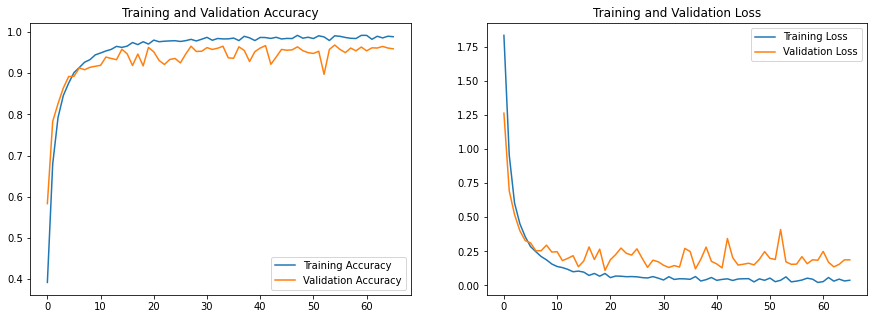

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Prediction Testing

Image to predict
Label:   Tomato_Late_blight
1/1 [==============================] - 0s 218ms/step
Predicted Label:   Tomato_Late_blight


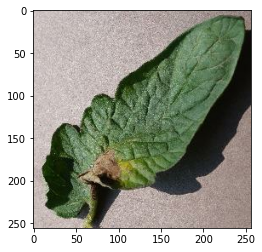

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype("uint8")
 
  print("Image to predict")
  plt.imshow(first_image)
  print("Label:  ",class_names[labels_batch[0].numpy()])

  batch_prediction=model.predict(images_batch)
  print("Predicted Label:  ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict_image(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)
  predictions = model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence= round(100* (np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


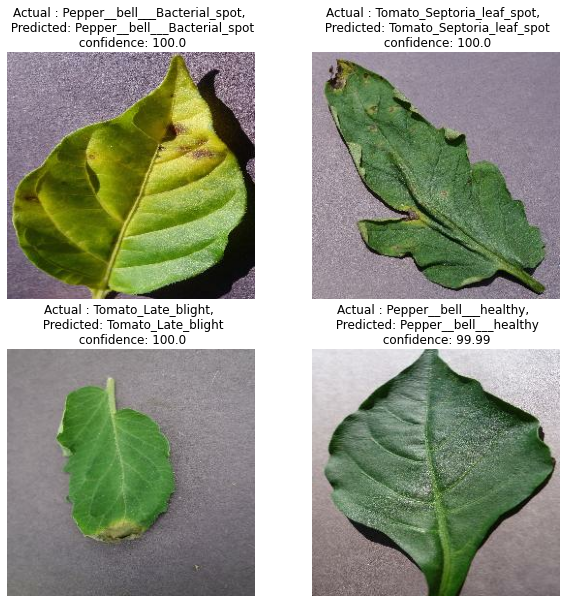

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class, confidence=predict_image(model, images[i].numpy())

    actual_class=class_names[labels[i]]
    plt.axis("off")
    plt.title(f"Actual : {actual_class}, \n Predicted: {predicted_class}\n confidence: {confidence}")

In [ ]:
model.save("/content/models/model_66")

In [ ]:
model.save("/content/models/model66.h5py")

In [ ]:
model.save("/content/models/mdl66.hdf5")

In [ ]:
from google.colab import files
files.download("/content/models")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !zip -r /content/ /content/models

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......max_pooling2d_5
.........vars
......sequential
.........layers
............rescaling
...............vars
............resizing
...............vars
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........var

['model.pkl']

In [ ]:
model.save("/content/models/mdl66.h5")

In [ ]:
model.save("/content/models/mdl.model")

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')
files.download("/content/models")

Mounted at /content/gdrive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>